# 回归

回归（Regression）最早是英国生物统计学家高尔顿和他的学生皮尔逊在研究父母和子女的身高遗传特性时提出的。1855年，他们在《遗传的身高向平均数方向的回归》中这样描述“子女的身高趋向于高于父母的身高的平均值，但一般不会超过父母的身高”，首次提出来回归的概念。现在的回归分析已经和这种趋势效应没有任何瓜葛了，它只是指源于高尔顿工作，用一个或多个自变量来预测因变量的数学方法。

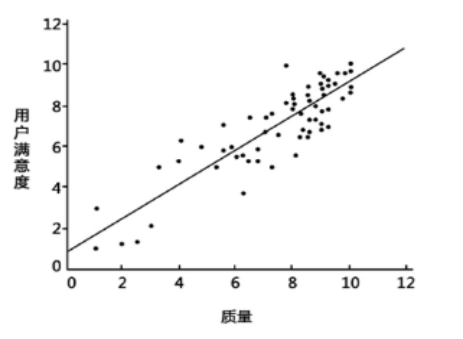


图1是一个简单的回归模型，X坐标是质量，Y坐标是用户满意度，从图中可知，产品的质量越高其用户评价越好，这可以拟合一条直线来预测新产品的用户满意度。

在回归模型中，我们需要预测的变量叫做因变量，比如产品质量；选取用来解释因变量变化的变量叫做自变量，比如用户满意度。回归的目的就是建立一个回归方程来预测目标值，整个回归的求解过程就是求这个回归方程的回归系数。

简言之，回归最简单的定义就是：

给出一个点集，构造一个函数来拟合这个点集，并且尽可能的让该点集与拟合函数间的误差最小，如果这个函数曲线是一条直线，那就被称为线性回归，如果曲线是一条三次曲线，就被称为三次多项回归。



# 线性回归


假设存在表1的数据集，它是某企业的成本和利润数据集。数据集中2002年到2016年的数据集称为训练集，整个训练集共15个样本数据。重点是成本和利润两个变量，成本是输入变量或一个特征，利润是输出变量或目标变量。

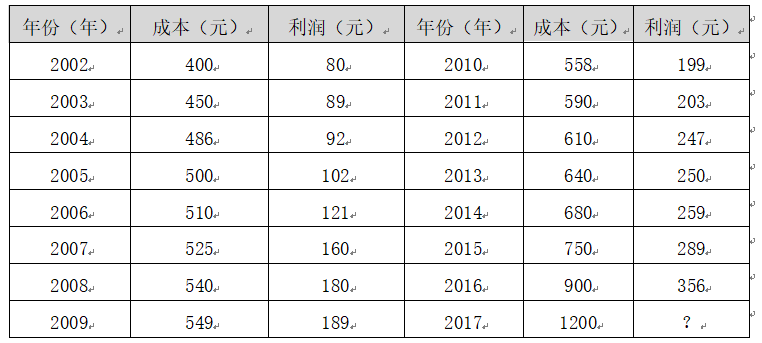

现建立模型，x表示企业成本，y表示企业利润，h（Hypothesis）表示将输入变量映射到输出变量y的函数，对应一个因变量的线性回归（单变量线性回归）公式如下：

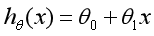

那么，现在要解决的问题是如何求解的两个参数和。我们的构想是选取的参数和使得函数尽可能接近y值，这里提出了求训练集(x,y)的平方误差函数（Squared Error Function）或最小二乘法。

在回归方程里，最小化误差平方和方法是求特征对应回归系数的最佳方法。误差是指预测y值和真实y值之间的差值，使用误差的简单累加将使得正差值和负差值相互抵消，所采用的**平方误差（最小二乘法）** 如下：

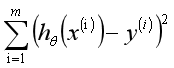

在数学上，求解过程就转化为求一组值使上式取到最小值，最常见的求解方法是**梯度下降法（Gradient Descent）**。根据平方误差，定义该线性回归模型的**损失函数（Cost Function）**为，公式如下：

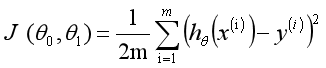

选择适当的参数让其最小化min，即可实现拟合求解过程。通过上面的这个示例，我们就可以对线性回归模型进行如下定义：根据样本x和y的坐标，去预估函数h，寻求变量之间近似的函数关系。公式如下：

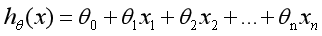

其中，n表示特征数目，表示每个训练样本的第i个特种值，当只有一个因变量x时，称为一元线性回归，类似于；而当多个因变量时，成为多元线性回归。我们的目的是使最小化，从而最好的将样本数据集进行拟合，更好地预测新的数据。

## LinearRegression线性回归

线性回归是数据挖掘中基础的算法之一，其核心思想是求解一组因变量和自变量之间的方程，得到回归函数，同时误差项通常使用最小二乘法进行计算。在本书常用的Sklaern机器学习包中将调用Linear_model子类的LinearRegression类进行线性回归模型计算。

LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=False) 

其中参数说明如下：
- copy_X：布尔型，默认为True。是否对X复制，如果选择False，则直接对原始数据进行覆盖，即经过中心化、标准化后，把新数据覆盖到原数据上。


- fit_intercept：布尔型，默认为True。是否对训练数据进行中心化，如果是True表示对输入的训练数据进行中心化处理，如果是False则输入数据已经中心化处理，后面的过程不再进行中心化处理。


- n_jobs：整型，默认为1。计算时设置的任务个数，如果设置为-1表示使用所有的CPU。该参数对于目标个数大于1且规模足够大的问题有加速作用。


- normalize：布尔型，默认为False。是否对数据进行标准化处理。## will be removed in 1.2


LinearRegression类主要包括如下方法：

- fit(X,y[,n_jobs]) 对训练集X，y进行训练，分析模型参数，填充数据集。其中X为特征，y为标记或类属性。


- predict(X)使用训练得到的估计器或模型对输入的X数据集进行预测，返回结果为预测值。数据集X通常划分为训练集和测试集。


- decision_function(X)使用训练得到的估计器或模型对数据集X进行预测。它与predict(X)区别在于该方法包含了对输入数据的类型检查和当前对象是否存在coef_属性的检查，更安全。


- score(X, y[,]samples_weight)返回对于以X为samples、y为target的预测效果评分。


- get_params([deep])获取该估计器（Estimator）的参数。


- coef_ 存放LinearRegression模型的回归系数。


- intercept_ 存放LinearRegression模型的回归截距。



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse


#X表示企业成本，Y表示企业利润
X=[[400],[450],[486],[500],[510],[525],[540],[549],[558],[590],[610],[640],[680],[750],[900]]
Y=[[80],[89],[92],[102],[121],[160],[180],[189],[199],[203],[247],[250],[259],[289],[356]]

model_lr = LinearRegression()
model_lr.fit(X, Y)

LinearRegression()

In [2]:
##预测成本1200元的利润

model_lr.predict([[1200]])

array([[575.13060917]])

In [3]:
## 输出intercept_和coef_ 
print(model_lr.intercept_)
print(model_lr.coef_)

[-173.70433124]
[[0.62402912]]


## 损失函数（最小二乘法）

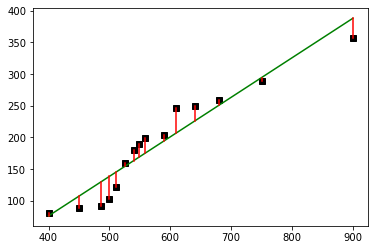

In [5]:
Y1=model_lr.predict(X)

plt.plot(X,Y,'ks')
plt.plot(X,Y1,'g-') #决策边界

# enumerate 函数可以把一个 list 变成索引-元素对
for idx, x in enumerate (X):
    plt.plot([x, x], [Y[idx], Y1[idx]], 'r-')
plt.show()


In [6]:
import numpy as np
print('误差平方和SSE',np.sum((Y- Y1)**2))

误差平方和SSE 8336.443392033469


In [7]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
mse= mse(Y,Y1)
mse

555.7628928022312

In [8]:
mse*len(Y)

8336.443392033469

## 残差分布

<AxesSubplot:ylabel='Count'>

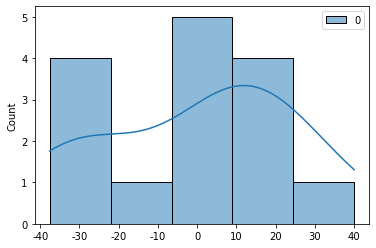

In [9]:
import seaborn as sns
sns.histplot((Y- Y1),kde=True)

## 解一元线性回归的最小二乘法

通过损失函数最小化获得参数，我们先求系数β。按照频率论的观点，我们首先需要计算x的方差和x与 y的协方差。

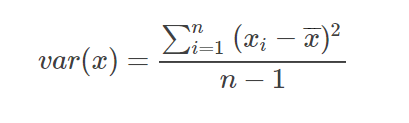

协方差表示两个变量的总体的变化趋势。如果两个变量的变化趋势一致，也就是说如果其中一个大于自身的期望值，另外一个也大于自身的期望值，那么两个变量之间的协方差就是正值。 如果两个变量的变化趋势相反，即其中一个大于自身的期望值，另外一个却小于自身的期望值，那么两个变量之间的协方差就是负值。如果两个变量不相关，则协方差为0，变量线性无关不表示一定没有其他相关性。

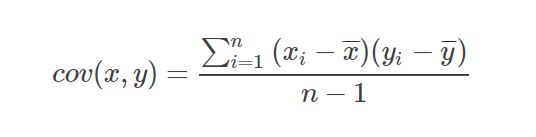


In [10]:
#最小二乘 b=np.cov(X,Y)/np.var(X)
b=np.cov(np.ravel(X), np.ravel(Y))[0][1]/np.var(np.ravel(X))
b

0.6686026253620847

## 评价指标

我们通常采用MSE、RMSE、MAE、R2来评价回归预测算法。

1、均方误差：MSE（Mean Squared Error）

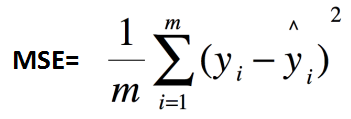

其中，为测试集上真实值-预测值。

2、均方根误差：RMSE（Root Mean Squard Error）

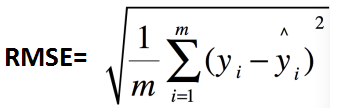

可以看出，RMSE=sqrt（MSE）。

3、平均绝对误差：MAE（Mean Absolute Error）

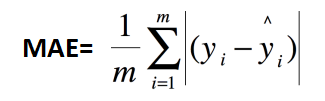

以上各指标，根据不同业务，会有不同的值大小，不具有可读性，因此还可以使用以下方式进行评测。

4、决定系数：R2（R-Square）

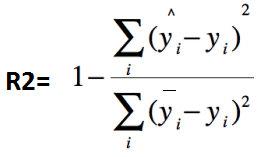

其中，分子部分表示真实值与预测值的平方差之和，类似于均方差 MSE；分母部分表示真实值与均值的平方差之和，类似于方差 Var。

根据 R-Squared 的取值，来判断模型的好坏，其取值范围为[0,1]：

如果结果是 0，说明模型拟合效果很差；

如果结果是 1，说明模型无错误。

一般来说，R-Squared 越大，表示模型拟合效果越好。R-Squared 反映的是大概有多准，因为，随着样本数量的增加，R-Square必然增加，无法真正定量说明准确程度，只能大概定量。


In [11]:
def get_score(y,pred_y):

    import sklearn.metrics as sm

    print("MAE(平均绝对值误差)：",sm.mean_absolute_error(y,pred_y))
    print("MSE(均方误差)：",sm.mean_squared_error(y,pred_y))
    print("RMSE(均方根误差)：",np.sqrt(sm.mean_squared_error(y,pred_y)))
    print("R2_score(R方值)：",sm.r2_score(y,pred_y))

## 线性回归预测糖尿病

糖尿病数据集（Diabetes Dataset），该数据集主要包括442行数据，10个特征值，分别是：年龄（Age）、性别（Sex）、体质指数（Body mass index）、平均血压（Average Blood Pressure）、S1~S6一年后疾病级数指标。预测指标为Target，它表示一年后患疾病的定量指标。原网址的描述如图4所示：


In [12]:
from sklearn import datasets
diabetes = datasets.load_diabetes()                           #载入数据  
print(diabetes.data)                                          #数据  
print(diabetes.target)                                        #类标  
print('总行数: ', len(diabetes.data), len(diabetes.target))
print('特征数: ', len(diabetes.data[0]))                      #每行数据集维数  
print('数据类型: ', diabetes.data.shape)
print(type(diabetes.data), type(diabetes.target))


[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [ ]:
#任选一特征构建线性回归

In [18]:
x_train = diabetes.data[:, 3].reshape(-1, 1)[:-20]
x_test = diabetes.data[:, 3].reshape(-1, 1)[-20:]
y_train = diabetes.target.reshape(-1, 1)[:-20]
y_test = diabetes.target.reshape(-1, 1)[-20:]

In [19]:
model_lr1 = LinearRegression()
model_lr1.fit(x_train, y_train)

y_pred1 = model_lr1.predict(x_test)

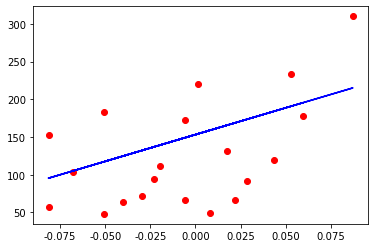

In [20]:
plt.scatter(x_test, y_test, color='r')
plt.plot(x_test, y_pred1, color='b')

# 多项式回归分析

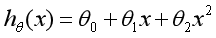线性回归研究的是一个目标变量和一个自变量之间的回归问题，但有时候在很多实际问题中，影响目标变量的自变量往往不止一个，而是多个，比如绵羊的产毛量这一变量同时受到绵羊体重、胸围、体长等多个变量的影响，因此需要设计一个目标变量与多个自变量间的回归分析，即多元回归分析。


由于线性回归并不适用于所有的数据，我们需要建立曲线来适应我们的数据，现实世界中的曲线关系很多都是增加多项式实现的，比如一个二次函数模型：

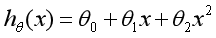

再或者一个三次函数模型：

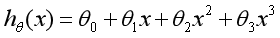

这两个模型我们绘制的图形如下所示：、


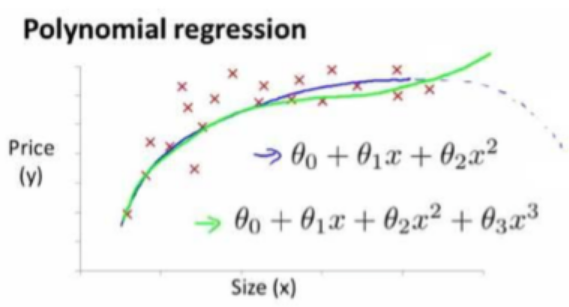



多项式回归（Polynomial Regression）是研究一个因变量与一个或多个自变量间多项式的回归分析方法。如果自变量只有一个时，称为一元多项式回归；如果自变量有多个时，称为多元多项式回归。在一元回归分析中，如果依变量y与自变量x的关系为非线性的，但是又找不到适当的函数曲线来拟合，则可以采用一元多项式回归。17.3小节主要讲解一元多次的多项式回归分析，一元m次多项式方程如下：

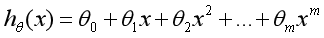


其方程的求解过程希望读者下来自行学习，接下来作者主要讲解Python如何代码实现多项式回归分析的。


## PolynomialFeatures



Python的多项式回归需要导入sklearn.preprocessing子类中PolynomialFeatures类实现。PolynomialFeatures对应的函数原型如下：

class sklearn.preprocessing.PolynomialFeatures(degree=2, 
		interaction_only=False, 
		include_bias=True)

其中，

- degree表示多项式阶数，一般默认值是2；

- interaction_only如果值是true（默认是False），则会产生相互影响的特征集；

- include_bias表示是否包含偏差列。



## 多项式回归预测成本和利润

数据集X:  [[400], [450], [486], [500], [510], [525], [540], [549], [558], [590], [610], [640], [680], [750], [900]]
数据集Y:  [[80], [89], [92], [102], [121], [160], [180], [189], [199], [203], [247], [250], [259], [289], [356]]
[[ 75.90731557]
 [294.31750652]
 [419.12332992]]
预测成本1200元的利润：$575.1


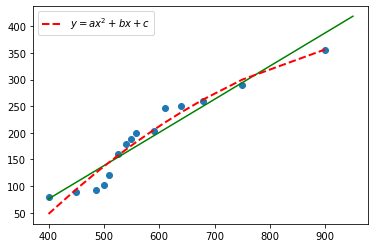

In [48]:
 
from sklearn.preprocessing import PolynomialFeatures

#X表示企业成本 Y表示企业利润
X = [[400], [450], [486], [500], [510], [525], [540], [549], [558], [590], [610], [640], [680], [750], [900]]
Y = [[80], [89], [92], [102], [121], [160], [180], [189], [199], [203], [247], [250], [259], [289], [356]]
print('数据集X: ', X)
print('数据集Y: ', Y)

#第一步 线性回归分析
clf = LinearRegression() 
clf.fit(X, Y)
X2 = [[400], [750], [950]]
Y2 = clf.predict(X2)
print(Y2)
res = clf.predict(np.array([1200]).reshape(-1, 1))[0]
print('预测成本1200元的利润：$%.1f' % res)
plt.plot(X, Y, 'o')
plt.plot(X2, Y2, 'g-')


#第二步 多项式回归分析
Poly = PolynomialFeatures(degree = 2 )  #实例化一个多项式
X_train_poly = Poly.fit_transform(X)    #用多项式x做变换
X_test_poly = Poly.transform(X2)
regressor_poly = LinearRegression()
regressor_poly.fit(X_train_poly, Y)


plt.plot(X, regressor_poly.predict(X_train_poly ), "r--",
         label="$y = ax^2 + bx + c$",linewidth=2)
plt.legend()
plt.show()


In [ ]:
get_score(Y, clf.predict(X))

In [ ]:
get_score(Y, regressor_poly.predict(X_train_poly))

# 正则化

在实际应用时，如果样本容量不远远大于样本的特征维度，很可能造成过拟合，对这种情况，我们有下面三个解决方式：

加大数据量
特征选择（降低特征维度）如 PCA 算法。
加入正则化

正则化一般是在损失函数（如上面介绍的最小二乘损失）上加入正则化项（表示模型的复杂度对模型的惩罚），下面我们介绍一般情况下的两种正则化框架。





## Lasso回归

Lasso是Least Absolute Shrinkage and Selection Operator的简称，是一种采用了L1正则化(L1-regularization)的线性回归方法，采用了L1正则会使得部分学习到的特征权值为0，从而达到稀疏化和特征选择的目的。

Lasso(Least absolute shrinkage and selection operator)方法是以缩小变量集（降阶）为思想的压缩估计方法。它通过构造一个惩罚函数，可以将变量的系数进行压缩并使某些回归系数变为0，进而达到变量选择的目的。

下图是Lasso回归的损失函数，式中加号后面一项即为L1正则化项。


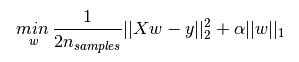


回归分析中回归表示特征的系数，从上式可以看到正则化项是对系数做了处理（限制）。

L1正则化是指权值向量中各个元素的**绝对值之和**，通常表示为 ||w||<sub>1</sub>

Python的机器学习包sklearn中用α表示正则化项系数,需要用户指定。一些文章也用λ表示。

**稀疏矩阵与特征选择**

L1正则化可以产生稀疏权值矩阵，即产生一个稀疏模型，可以用于特征选择。一定程度上，L1也可以防止过拟合。

**稀疏矩阵**指的是很多元素为0，只有少数元素是非零值的矩阵，即得到的线性回归模型的大部分系数都是0. 

通常机器学习中特征数量很多，例如文本处理时，如果将一个词组（term）作为一个特征，那么特征数量会达到上万个（bigram）。

在预测或分类时，那么多特征显然难以选择，但是如果代入这些特征得到的模型是一个稀疏模型，表示只有少数特征对这个模型有贡献，绝大部分特征是没有贡献的，或者贡献微小（因为它们前面的系数是0或者是很小的值，即使去掉对模型也没有什么影响），此时我们就可以只关注系数是非零值的特征。这就是稀疏模型与特征选择的关系。


**L1正则化的直观理解**


假设有如下带L1正则化的损失函数：

$$ J=J_0+ α\sum_{i = 0}{∣w∣}\ $$


其中J_0是原始的损失函数，加号后面的一项是L1正则化项，α是正则化系数。注意到L1正则化是权值的绝对值之和，J是带有绝对值符号的函数，，因此J是不完全可微的。机器学习的任务就是要通过一些方法（比如梯度下降）求出损失函数的最小值。当我们在原始损失函数J_0后添加L1正则化项时，相当于对J_0做了一个约束。令$$ L = α\sum_{i = 0}{∣w∣}\ $$ 则J = J_0 + L，此时我们的任务变成在L约束下求出J_0取最小值的解。考虑二维的情况，即只有两个权值w<sup>1</sup>和w<sup>2</sup>，此时
L =|w<sup>1</sup>|+|w<sup>2</sup>|。对于梯度下降法，求解J<sub>0</sub>的过程可以画出等值线，同时L1正则化的函数L也可以在w<sup>1</sup>w<sup>2</sup>的二维平面上画出来。如下图：

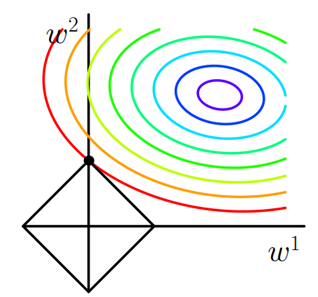



图中等值线是J<sub>0</sub>的等值线，黑色方形是L函数的图形,L =|w<sup>1</sup>|+|w<sup>2</sup>|。在图中，当J<sub>0</sub>等值线与L函数的图形首次相交的地方就是最优解。上图中与在的一个顶点处相交，这个顶点就是最优解。注意到这个顶点的值是(w<sup>1</sup>,w<sup>2</sup>)=(0,w)。可以直观想象，因为L 函数有很多『突出的角』（二维情况下四个，多维情况下更多），与这些角接触的机率会远大于与其它部位接触的机率，而在这些角上，会有很多权值等于0，这就是为什么L1正则化可以产生稀疏模型，进而可以用于特征选择。


而正则化前面的系数α，可以控制L图形的大小。α越小，L的图形越大（上图中的黑色方框）；α越大，L的图形就越小，可以小到黑色方框只超出原点范围一点点，这是最优点的值(w<sup>1</sup>,w<sup>2</sup>)=(0,w) 中的w可以取到很小的值。


### Lasso回归函数


sklearn.linear_model.Lasso(alpha=1.0,fit_intercept=True,normalize=False,precompute=False,copy_x=True, max_iter=1000,tol=0.001,warm_start=False,positive=False,random_state=None,seleection='cyclic')

**参数说明：**

alpha：a值，其值越大说明正则化项的占比越大。

fit_intercept:一个布尔值，制定是否需要计算b值，如果为False，那么就不用计算b值(模型会假设你的数据已经中性化了，这里的b值是线性函数y=w1*x1+w2*x2+...+Wn*Xn +b中的b值)

max_iter：指定最大的迭代次数，值为整数。如果为None，则表示使用默认值(不同的solver其默认值不同)。

copy_x：是否复制x的布尔值，为True表示要复制。

tol：一个浮点数，指定判断迭代收敛与否的阈值。

precompute：一个布尔值或者一个序列，它决定是否提前计算Gram矩阵加速计算

warm_start：一个布尔值，如果为True，那么使用前一次训练的结果继续训练。否则从头开始训练。

positive：布尔值，如果为True，则强制要求权重向量的分量都为整数。

selection：字符串，可以是‘cylic’或者‘random’。它指定了当每轮迭代的时候选择权重的那个分量来更新：当选择random更新的时候，随机选择权重向量的一个分量来更新；当选择cylic更新的时候，则从前向后的顺序依次选择权重向量的一个分量来更新。

random_state：一个整数或者RandomState实例，也可能是None(如果random_state为整数，则他指定了随机数生成的种子。如果为RandomState实例，则指定了随机数生成器。如为None，则使用默认的随机数生成器)

**属性说明：**

coef_：权重向量。

intercept_：b值

n_iter_:实际迭代次数。

**方法说明：**

fit(x, y[,sample_weight):训练模型。

predict(x):用模型进行预测。

score(x, y[,sample_weight]):返回测试性能得分(测试分数不超过1，但是可能为负数(当预测效果太差的时候)，score值越接近1，说明预测效果越好)。

In [ ]:
from sklearn.linear_model import Lasso,LassoCV

model_Lasso=Lasso()
model_Lasso.fit(X,Y)

## Ridge回归

对于线性回归模型，使用L2正则化的模型叫做Ridge回归（岭回归）下图是Ridge回归的损失函数，式中加号后面一项即为L2正则化项。

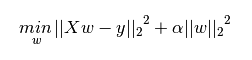


回归分析中回归表示特征的系数，从上式可以看到正则化项是对系数做了处理（限制）。

L2正则化是指权值向量中各个元素的**平方和然后再求平方根**（可以看到Ridge回归的L2正则化项有平方符号），通常表示为 ||w||<sub>2</sub><sup>2</sup> 。L2正则化可以防止模型过拟合（overfitting）。

假设有如下带L2正则化的损失函数：


$$ J=J_0+ α\sum_{i = 0}{∣w∣^2}\ $$





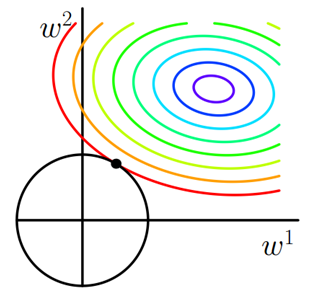

二维平面下L2正则化的函数图形是个圆（绝对值的平方和，是个圆），与方形相比，被磨去了棱角。因此，J<sub>0</sub>与L相交时使得w<sup>1</sup>或w<sup>2</sup>等于零的机率小了许多，这就是为什么L2正则化不具有稀疏性的原因。


**L2正则化和过拟合的关系**

拟合过程中通常都倾向于让权值尽可能小，最后构造一个所有参数都比较小的模型。因为一般认为参数值小的模型比较简单，能适应不同的数据集，也在一定程度上避免了过拟合现象。可以设想一下对于一个线性回归方程，若参数很大，那么只要数据偏移一点点，就会对结果造成很大的影响；但如果参数足够小，数据偏移得多一点也不会对结果造成什么影响，专业一点的说法是『抗扰动能力强』。


以线性回归中的梯度下降法为例，假设要求解的参数为θ，h<sub>θ</sub>( x ) 是我们的假设函数。

线性回归一般使用平方差损失函数，单个样本的平方差是 $( h_θ( x )- y)^2$，如果考虑所有样本，损失函数是对每个样本的平方差求和，假设有m个样本，线性回归的代价函数如下，为了后续处理方便，乘以一个常数$\frac{1}{2m}$

$$J(θ)=\frac{1}{2m}\sum_{i = 0}^{m}{( h_θ( x^i )- y^i)^2}$$


在梯度下降算法中，需要先对参数求导，得到梯度。梯度本身是上升最快的方向，为了让损失尽可能小，沿梯度的负方向更新参数即可。得到最终用于迭代计算参数$θ_j $ 的形式：

$$θ_j:= θ_j(1 -a\frac{λ}{m})-a\frac{1}{m}\sum_{i = 0}^{m}{( h_θ( x^i )- y^i)^2}$$

其中λ就是正则化参数。从上式可以看到，与未添加L2正则化的迭代公式相比，每一次迭代，$θ_j $都要先乘以一个小于1的因子（即($1 -a\frac{λ}{m})$)，从而使得$θ_j $不断减小，因此总的来看，θ是不断减小的。


### Lasso回归函数


sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=1e-3, solver=”auto”, random_state=None)


**参数说明：**

alpha：{float, array-like}, shape (n_targets) 正则化力度，必须是一个正浮点数。正则化提升了问题的条件，减少了估计器的方差。较大的值指定了更强的正则化。在其他模型，比如LogisticRegression 或者LinearSVC，αα对应C−1C−1。如果传递了一个数组，则假定对目标进行了特定惩罚，因此，它们必须在数值上一直，即数量等于特征数量。

fit_intercept：boolean,是否计算该模型的截距。如果设置为False，将不会在计算中使用截距

normalize： boolean, optional, default False,当fit_intercept设置为False时，该参数将会被忽略。如果为True，则回归前，回归变量X将会进行归一化，减去均值，然后除以L2范数。如果想要标准化，请在评估器（normalize参数为False）调用fit方法前调用sklean.preprocessing.StandardScaler，

copy_X：boolean, optional, default True,如果是True，x将被复制，否则，有可能被覆盖。

max_iter： int, optional,共轭梯度求解器的最大迭代次数。对于‘sparse_cg’ 和 ‘lsqr’ 求解器，默认值由 scipy.sparse.linalg确定。对于‘sag’求解器，默认值是1000。

tol：float：求解方法精度

solver： {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’}计算例程中使用的求解程序


# 实例：销售预测

In [18]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt

data = pd.read_table('products_sales.txt', delimiter=',')
data

,是否限购,促销类型,促销活动分级,产品分级,促销资源位数量,POP比例,价格,折扣率,促销展示时长,促销费用,订单数
0,0,6,0,1,1,0.08,140.0,0.83,93,888,1981
1,0,0,0,1,1,0.10,144.0,0.75,150,836,986
2,0,1,1,1,1,0.12,149.0,0.84,86,1330,1416
3,0,3,1,2,1,0.12,141.0,0.82,95,2273,2368
4,0,0,0,1,1,0.10,146.0,0.59,73,1456,1529
...,...,...,...,...,...,...,...,...,...,...,...
726,0,5,1,1,8,0.79,149.0,0.83,829,4634,5463
727,0,5,1,1,8,0.79,154.0,0.83,670,3176,3846
728,0,5,1,1,8,0.84,158.0,0.87,562,2825,3387
729,0,6,0,1,8,0.80,150.0,0.87,987,2298,3285


属性说明：

- 是否限购，1代表有，0代表没有。


- 促销活动类型，分类型变量，值域为[0,6]代表7种不同类型的促销活动，例如单品活动、跨店铺活动、综合性活动、3C大品类活动等。


- 促销活动分级，分类型变量，值域为[0,1]，分别代表促销活动重要性程度。


- 产品分级，分类型变量，值域为[1,3]，分别代表运营部门对于商品重要性的分级。


- 促销资源位数量，整数型变量，代表每次该商品在参加促销活动时有多少个资源位入口。


- POP比例，POP广告中包含该商品的比例，浮点型变量，值域[0,1]，值越大代表包含该商品的广告越多。


- 单品价格，整数型变量，代码商品在不同阶段的实际销售价格。


- 折扣率，浮点型变量，值域[0,1]，值越大代表折扣力度越大。


- 促销展示时长，整数型变量，值越大代表展示的时间越长。


- 促销费用，整数型变量，值越大代表用于该单品的综合促销费用越高，这里面包含促销费用、广告费用、优惠券费用等综合摊派的费用。


- 订单数，整数型，用户下达数量。


## 数据审查

In [19]:
# 数据概览
print('{:*^60}'.format('Data overview:'),'\n',data.tail(2))#打印原始数据后2条
print('{:*^60}'.format('Data dtypes:'),'\n',data.dtypes)# 数据类型

***********************Data overview:*********************** 
      是否限购  促销类型  促销活动分级  产品分级  促销资源位数量  POP比例     价格   折扣率  促销展示时长  促销费用   订单数
729     0     6       0     1        8    0.8  150.0  0.87     987  2298  3285
730     0     6       0     1        9    0.8  149.0  0.84    1448  3392  4840
************************Data dtypes:************************ 
 是否限购         int64
促销类型         int64
促销活动分级       int64
产品分级         int64
促销资源位数量      int64
POP比例      float64
价格         float64
折扣率        float64
促销展示时长       int64
促销费用         int64
订单数          int64
dtype: object


In [20]:
# 缺失值审查
na_cols = data.isnull().any(axis=0)  # 查看每一列是否具有缺失值
print('{:*^60}'.format('NA Cols:'))
print(na_cols[na_cols]==True)  # 查看具有缺失值的列
print('Total NA lines is: {0}'.format(data.isnull().any(axis=1).sum()))  # 查看具有缺失值的行总记录数

**************************NA Cols:**************************
价格    True
dtype: bool
Total NA lines is: 2


### 数据预处理

In [21]:
# 缺失值处理
sales_data = data.fillna(data['价格'].mean())  # 缺失值替换为均值

###  划分训练集和测试集

In [27]:
# 分割数据集X和y
from sklearn.model_selection import train_test_split

X = sales_data.iloc[:, :-1]
y = sales_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [28]:
X_train

,是否限购,促销类型,促销活动分级,产品分级,促销资源位数量,POP比例,价格,折扣率,促销展示时长,促销费用
17,0,6,0,2,2,0.17,183.0,0.78,67,1234
554,0,6,0,2,7,0.61,180.0,0.72,1557,4419
500,0,3,1,2,6,0.58,184.0,0.69,547,3325
282,0,2,1,3,4,0.42,196.0,0.88,69,1538
570,0,0,0,2,7,0.62,182.0,0.78,1338,2482
...,...,...,...,...,...,...,...,...,...,...
189,0,2,1,1,3,0.35,184.0,0.88,439,3900
260,0,3,1,1,4,0.41,176.0,0.94,305,3804
351,0,5,1,1,5,0.47,159.0,0.77,894,3714
163,1,5,0,1,3,0.31,145.0,0.69,440,2928


In [29]:
y_train

17     1301
554    5976
500    3872
282    1607
570    3820
       ... 
189    4339
260    4109
351    4608
163    3368
56     3310
Name: 订单数, Length: 511, dtype: int64

### 模型训练


#### 线性回归

In [30]:
model_lr2 = LinearRegression()
model_lr2.fit(X_train, y_train)
y_pred2 = model_lr2.predict(X_test)

In [31]:
get_score(y_test, y_pred2)

MAE(平均绝对值误差)： 577.3791170602883
MSE(均方误差)： 550963.1256496238
RMSE(均方根误差)： 742.2689038681492
R2_score(R方值)： 0.8671828000181481


In [32]:
print(model_lr2.intercept_)
print(model_lr2.coef_)

-146.1474166392818
[-2.52388682e+01 -2.11046412e+00  1.17956610e+03 -1.93448053e+02
  1.08074489e+02 -3.00003443e+02  9.61515973e-02  1.00686680e+03
  1.73186265e+00  3.87638282e-01]


#### Lasso回归

In [33]:
from sklearn.linear_model import Lasso, LassoCV

In [37]:
model_Lasso = Lasso(alpha=10)
model_Lasso.fit(X_train, y_train)
y_pred3 = model_Lasso.predict(X_test)

get_score(y_test, y_pred3)

MAE(平均绝对值误差)： 564.8658758775716
MSE(均方误差)： 538130.6541069449
RMSE(均方根误差)： 733.5738913749213
R2_score(R方值)： 0.8702762428635941


In [38]:
print(model_Lasso.intercept_)
print(model_Lasso.coef_)

489.0455533839977
[-0.00000000e+00 -3.49884723e-01  1.10770180e+03 -1.62886063e+02
  8.08774432e+01  0.00000000e+00  9.25211984e-01  0.00000000e+00
  1.71561094e+00  4.02210513e-01]


In [39]:
X_train.columns

Index(['是否限购', '促销类型', '促销活动分级', '产品分级', '促销资源位数量', 'POP比例', '价格', '折扣率',
       '促销展示时长', '促销费用'],
      dtype='object')

Different Coefficients:[-2.52367607e+01 -2.10855134e+00  1.17953583e+03 -1.93441097e+02
  1.07962084e+02 -2.98630385e+02  9.58915869e-02  1.00662894e+03
  1.73183784e+00  3.87639552e-01], intercept: -145.99
Different Residual sum of squares: 550956.31
Different score: 0.87 0.001
Different Coefficients:[-2.52177932e+01 -2.09133665e+00  1.17926335e+03 -1.93378492e+02
  1.06950465e+02 -2.86273181e+02  9.35515632e-02  1.00448819e+03
  1.73161452e+00  3.87650980e-01], intercept: -144.52
Different Residual sum of squares: 550895.23
Different score: 0.87 0.01
Different Coefficients:[-2.51756430e+01 -2.05308076e+00  1.17865785e+03 -1.93239367e+02
  1.04702346e+02 -2.58811838e+02  8.83513119e-02  9.99730917e+02
  1.73111824e+00  3.87676377e-01], intercept: -141.28
Different Residual sum of squares: 550761.40
Different score: 0.87 0.03
Different Coefficients:[-2.51334923e+01 -2.01482276e+00  1.17805232e+03 -1.93100236e+02
  1.02454071e+02 -2.31348714e+02  8.31506617e-02  9.94973582e+02
  1.73062

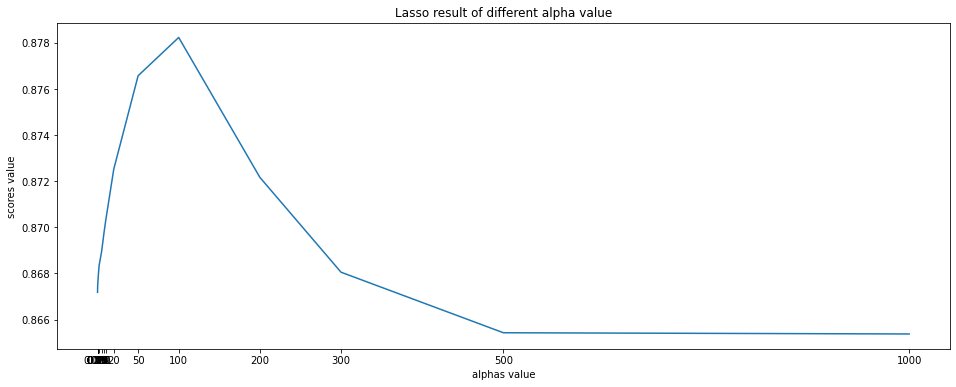

In [36]:
alphas = [0.001,0.01,0.03,0.05,0.07,0.09,0.11,0.13,0.15,0.17,0.19,0.5,0.7,0.9,1,2,5,8,10,20,50,100,200,300,500,1000]

scores=[]
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train,y_train)
    scores.append(model.score(X_test,y_test))
    print("Different Coefficients:%s, intercept: %.2f"%(model.coef_, model.intercept_))
    print("Different Residual sum of squares: %.2f"%np.mean((model.predict(X_test)-y_test)**2))
    print("Different score: %.2f" %model.score(X_test,y_test),alpha)

#可视化
plt.figure(figsize=(16,6))
plt.plot(alphas, scores)
plt.xticks(ticks=alphas,labels=alphas)
plt.xlabel("alphas value")
plt.ylabel("scores value")
plt.title("Lasso result of different alpha value" )
plt.show()

#### Ridge岭回归

In [44]:
from sklearn.linear_model import Ridge, RidgeCV

model_ridge = Ridge(alpha=50)
model_ridge.fit(X_train, y_train)
y_pred4 = model_ridge.predict(X_test)

get_score(y_test, y_pred4)

print(model_ridge.intercept_)
print(model_ridge.coef_)

MAE(平均绝对值误差)： 551.5475478163518
MSE(均方误差)： 499272.2337601356
RMSE(均方根误差)： 706.5919853494912
R2_score(R方值)： 0.8796435967678972
855.9781418656735
[-4.09950197e+01  2.17037446e+00  6.08353382e+02 -1.40400944e+02
  1.21289809e+02  2.10834948e+01 -4.78946003e-01  6.26554445e+01
  1.44131381e+00  4.39489791e-01]


##### RidgeCV交叉验证

50.0
(511, 26)


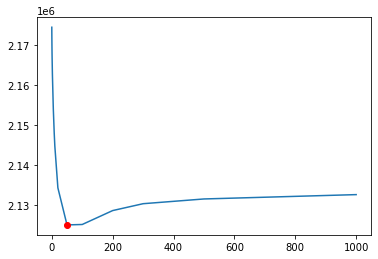

In [42]:
alphas = [0.001,0.01,0.03,0.05,0.07,0.09,0.11,0.13,0.15,0.17,0.19,0.5,0.7,0.9,1,2,5,8,10,20,50,100,200,300,500,1000]

model_cv = RidgeCV(alphas=alphas, store_cv_values=True,)
model_cv.fit(X_train,y_train)

# 岭系数
print(model_cv.alpha_)
# loss值（26个loss值，511个岭系数，每一个系数对应一个loss值）
print(model_cv.cv_values_.shape)

# 岭系数跟loss值的关系
plt.plot(alphas,model_cv.cv_values_.mean(axis=0))

# 选取的岭系数值的位置
plt.plot(model_cv.alpha_,min(model_cv.cv_values_.mean(axis=0)),'ro')
plt.show()


In [43]:
model_cv.cv_values_

array([[8.59587014e+04, 8.59628771e+04, 8.59520546e+04, ...,
        2.30050152e+05, 3.06974246e+05, 4.12660465e+05],
       [6.67688619e+05, 6.67126887e+05, 6.65853235e+05, ...,
        2.36831977e+04, 1.63872521e+04, 1.32632792e+04],
       [3.79267595e+04, 3.81753990e+04, 3.87174950e+04, ...,
        3.75027034e+04, 2.85023763e+04, 1.77167638e+04],
       ...,
       [1.62355382e+05, 1.62376357e+05, 1.62429455e+05, ...,
        4.76298670e+03, 1.55058202e+03, 1.16191686e+02],
       [8.74004244e+05, 8.72789767e+05, 8.70170745e+05, ...,
        4.78845541e+03, 1.70079911e+01, 3.76071108e+03],
       [1.06322040e+04, 1.05923656e+04, 1.04988739e+04, ...,
        6.38498053e+04, 5.66778521e+04, 3.80124350e+04]])

### 模型评估

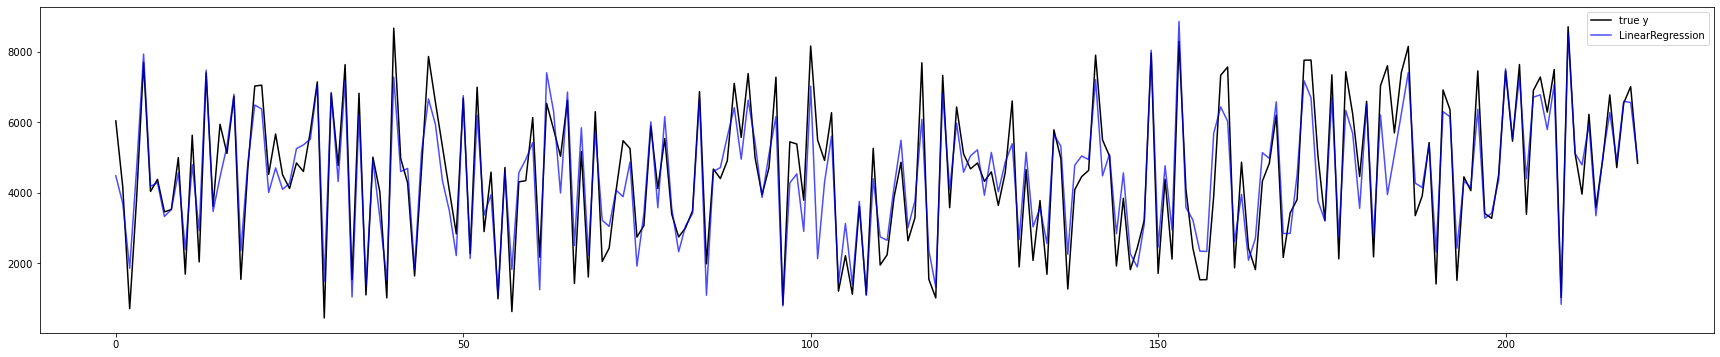

In [50]:

plt.figure(figsize=(30,6))  
plt.plot(np.arange(X_test.shape[0]), y_test, linestyle='-', color='k',label='true y') 
plt.plot(np.arange(X_test.shape[0]), y_pred2, linestyle='-', color='b',alpha=0.7,label='LinearRegression')  
# plt.plot(np.arange(X_test.shape[0]), y_pred3, linestyle='-', color='c',alpha=0.7,label='Lasso') 
# plt.plot(np.arange(X_test.shape[0]), y_pred4, linestyle='-', color='r',alpha=0.7,label='Ridge')  

plt.legend()

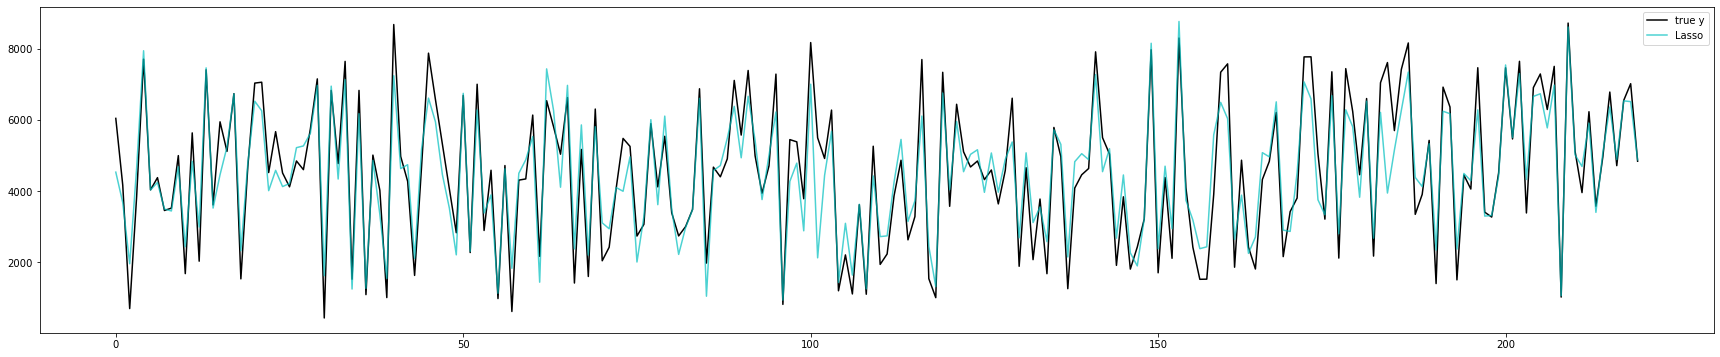

In [51]:
plt.figure(figsize=(30,6))  
plt.plot(np.arange(X_test.shape[0]), y_test, linestyle='-', color='k',label='true y') 
# plt.plot(np.arange(X_test.shape[0]), y_pred2, linestyle='-', color='b',alpha=0.7,label='LinearRegression')  
plt.plot(np.arange(X_test.shape[0]), y_pred3, linestyle='-', color='c',alpha=0.7,label='Lasso') 
# plt.plot(np.arange(X_test.shape[0]), y_pred4, linestyle='-', color='r',alpha=0.7,label='Ridge')  

plt.legend()

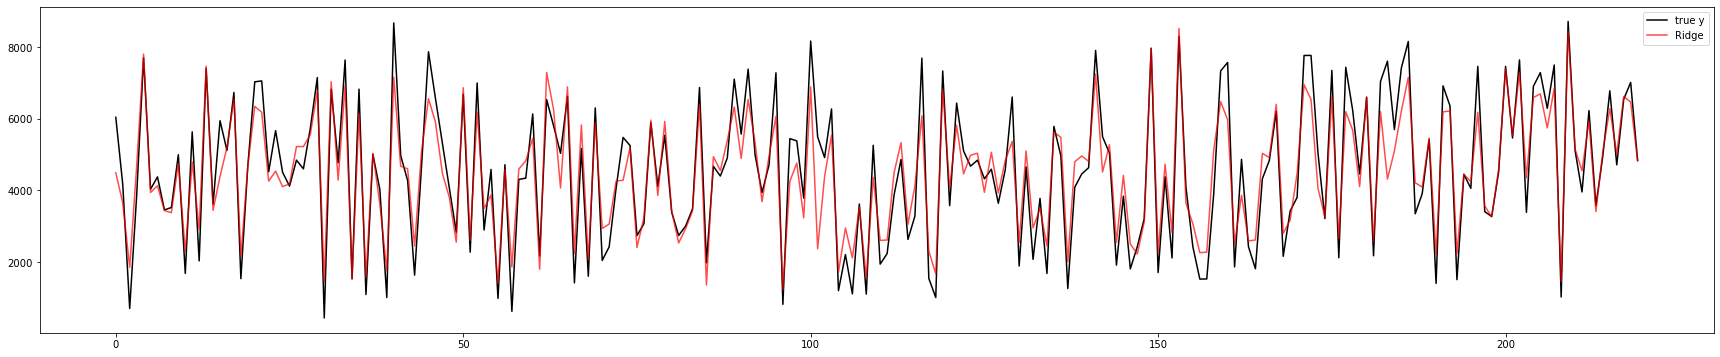

In [52]:
plt.figure(figsize=(30,6))  
plt.plot(np.arange(X_test.shape[0]), y_test, linestyle='-', color='k',label='true y') 
# plt.plot(np.arange(X_test.shape[0]), y_pred2, linestyle='-', color='b',alpha=0.7,label='LinearRegression')  
# plt.plot(np.arange(X_test.shape[0]), y_pred3, linestyle='-', color='c',alpha=0.7,label='Lasso') 
plt.plot(np.arange(X_test.shape[0]), y_pred4, linestyle='-', color='r',alpha=0.7,label='Ridge')  

plt.legend()

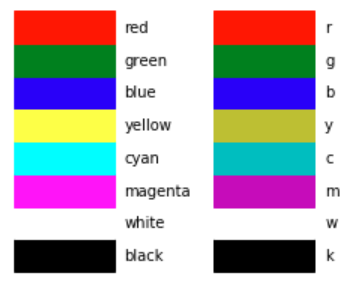